In [1]:
import cv2
from PIL import Image
import numpy as np
from tensorflow import keras
from collections import Counter
import matplotlib.pyplot as plt
import os

In [2]:
def predImageGenerate(src):
    max_height = 400
    max_width = 600

    height, width = src.shape[0:2]
    ratio = height / max_height
    
    # 입력 이미지의 높이가 설정한 이미지의 최대 높이보다 크면 리사이즈 수행
    if height > max_height :
        resize_height = max_height
        resize_width = np.uint(width // ratio)
        img = cv2.resize(src, (resize_width, resize_height), cv2.INTER_AREA) # 폭이 길면 중심 기준으로 좌우 잘림
        dy = 0

    
    # 입력 이미지의 높이가 설정한 이미지의 최대 높이보다 작으면 리사이즈 수행하지 않음
    else : 
        resize_height = height
        resize_width = width
        dy = (max_height - resize_height) // 2

    dx = (max_width - resize_width) // 2
    mtrx = np.float32([[1,0,dx],[0,1,dy]])

    # 입력 이미지를 규격 프레임의 중심에 넣는다
    img = cv2.warpAffine(img, mtrx, (max_width, max_height))

    # 이미지 회전없이 0.9 비율로 생성 - 학습시 회전을 위해 0.9배후 회전하여 같은 영상 생성
    mtrx_rot = cv2.getRotationMatrix2D((max_width/2, max_height/2), 0, 0.9)
    return cv2.warpAffine(img, mtrx_rot, (max_width,max_height))  

In [3]:
# 전송받은 영상 학습 영상으로 변환
file = '../Data/Artist/original/org_select/1011.jpg'
img = cv2.imread(file, cv2.IMREAD_COLOR)

file2 = '../Data/Artist/test.jpg'
cv2.imwrite(file2, predImageGenerate(img))
test_img = np.array(Image.open('../Data/Artist/test.jpg'), dtype=np.int32)

# 필요없는 파일 삭제
if os.path.isfile(file2):
  os.remove(file2)

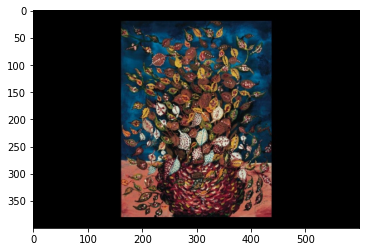

In [4]:
plt.imshow(test_img)
plt.show()

In [5]:
testData = test_img.reshape(-1, 400, 600, 3) / 255.0

In [6]:
# 학습한 모델정보 읽기
model_port_still = keras.models.load_model('../Data/Artist/model/model_v3/H5/port_still_v3.h5')
model_land_still = keras.models.load_model('../Data/Artist/model/model_v3/H5/land_still_v3.h5')
model_land_port = keras.models.load_model('../Data/Artist/model/model_v3/H5/land_port_v3.h5')

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-08-05 10:57:30.648291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-05 10:57:30.648415: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
classes1 = ['portrait', 'stll life']
classes2= ['landscape', 'stll life']
classes3 = ['landscape', 'portrait']

In [8]:
pred_1 = model_port_still(testData)
pred_2 = model_land_still(testData)
pred_3 = model_land_port(testData)
pred= [classes1[np.argmax(pred_1)], classes2[np.argmax(pred_2)],classes3[np.argmax(pred_3)]]
pred_x = Counter(pred)
pred_x.most_common(n=1)[0][0]


'stll life'